In [5]:
# ---------------------------------------------
# 日本の銘柄はpandas_datareaderで読み込めないので、スクレイピングのメソッドを作って読み込み。
from ok_datareaderYahooJP import datareaderYahooJP
import datetime

# 過去2か月間のデータを取得
from ok_datareaderYahooJP import datareaderYahooJP
end = datetime.datetime.today()
start = end - datetime.timedelta(days=60)
start_x = end - datetime.timedelta(days=30)

ucd = datareaderYahooJP(8057, start=start, end=end)
print('--- ucd.head() ---')
print(ucd.head())

# ---------------------------------------------
# 7日分日付を進める
import copy

# ucdのデータをdeapcopyする。
ucd_ahead7 = copy.deepcopy(ucd)
#print(ucd_ahead.head())

# ucd_aheadはリストではなくDataFrame
# マルチインデックスmultiindexをカラムcolumnに置きなおす。
ucd_ahead7.reset_index(inplace=True)
#print(ucd_ahead.head())

# ucd_aheadのDate部分に7日分を足す（7日分日付を進める）
import datetime
ucd_ahead7["Date"] = ucd_ahead7["Date"] + datetime.timedelta(days=7)
#print(ucd_ahead.head())

# indexを設定する
ucd_ahead7.set_index('Date', inplace=True)
#print(ucd_ahead.head())

print('--- ucd_ahead7.head() ---')
print(ucd_ahead7.head())

--- ucd.head() ---
            Open  High   Low  Close  Volume  Adj Close
Date                                                  
2017-05-12  2612  2623  2590   2623   10400       2623
2017-05-15  2576  2629  2576   2606    9100       2606
2017-05-16  2598  2625  2598   2624    8400       2624
2017-05-17  2602  2611  2591   2607    8200       2607
2017-05-18  2581  2593  2565   2580    8200       2580
--- ucd_ahead7.head() ---
            Open  High   Low  Close  Volume  Adj Close
Date                                                  
2017-05-19  2612  2623  2590   2623   10400       2623
2017-05-22  2576  2629  2576   2606    9100       2606
2017-05-23  2598  2625  2598   2624    8400       2624
2017-05-24  2602  2611  2591   2607    8200       2607
2017-05-25  2581  2593  2565   2580    8200       2580


In [2]:
#----------------------------------------
# 終値の対数変化率をとって、変化率を計算
import numpy as np
print('--- calculate logarithm of ucd ---')
ucd_Close_ln = np.log(ucd.Close)
print(ucd_Close_ln.head())

# ucd_ahead7の終値の指数の対数を取得
ucd_ahead7_Close_ln = np.log(ucd_ahead7.Close)
print('--- calculate logarithm of ucd_ahead7 ---')
print(ucd_ahead7_Close_ln.head())


--- calculate logarithm of ucd ---
Date
2017-05-12    7.872074
2017-05-15    7.865572
2017-05-16    7.872455
2017-05-17    7.865955
2017-05-18    7.855545
Name: Close, dtype: float64
--- calculate logarithm of ucd_ahead7 ---
Date
2017-05-19    7.872074
2017-05-22    7.865572
2017-05-23    7.872455
2017-05-24    7.865955
2017-05-25    7.855545
Name: Close, dtype: float64


(12377, 12398)

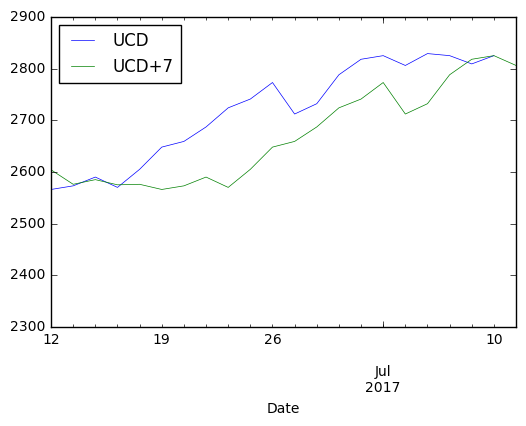

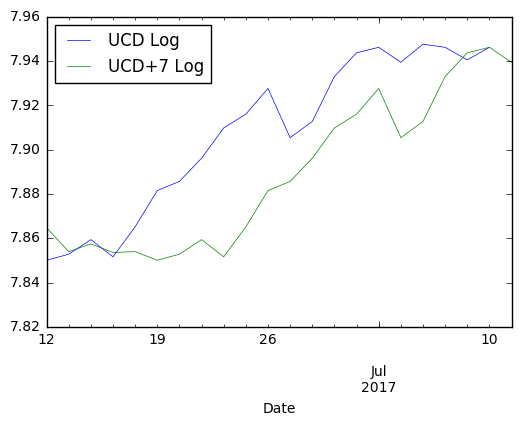

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# -------------------------------------
fig_1 = plt.figure()
g_1=fig_1.add_subplot(1,1,1)
ucd.Close.plot(ax=g_1, style='b-',linewidth=0.5, label='UCD')
ucd_ahead7.Close.plot(ax=g_1, style='g-',linewidth=0.5, label='UCD+7')
g_1.legend(loc='upper left')
g_1.set_xlim([start_x,end])
g_1.set_ylim([2300,2900])


# -------------------------------------
fig_2 = plt.figure()
g_2=fig_2.add_subplot(1,1,1)
ucd_Close_ln.plot(ax=g_2, style='b-',linewidth=0.5, label='UCD Log')
ucd_ahead7_Close_ln.plot(ax=g_2, style='g-',linewidth=0.5, label='UCD+7 Log')
g_2.legend(loc='upper left')
g_2.set_xlim([start_x,end])


In [4]:
import pandas_datareader.data as pdr

#--------------------------------------
# 例えばAazon
ama = pdr.DataReader("AMZN", "google", start, end)
print(ama.head())

# 例えばApple
apl = pdr.DataReader("AAPL", "google", start, end)
print(apl.head())



              Open    High     Low   Close   Volume
Date                                               
2017-05-12  954.50  962.79  951.53  961.35  3625857
2017-05-15  958.73  963.15  956.06  957.97  4270625
2017-05-16  961.00  970.06  960.91  966.07  3126051
2017-05-17  954.70  960.40  944.12  944.76  5145578
2017-05-18  944.80  962.75  944.76  958.49  3939347
              Open    High     Low   Close    Volume
Date                                                
2017-05-12  154.70  156.42  154.67  156.10  32527017
2017-05-15  156.01  156.65  155.05  155.70  26009719
2017-05-16  155.94  156.06  154.72  155.47  20048478
2017-05-17  153.60  154.57  149.71  150.25  50767678
2017-05-18  151.27  153.34  151.13  152.54  33568215


(-1, 1)

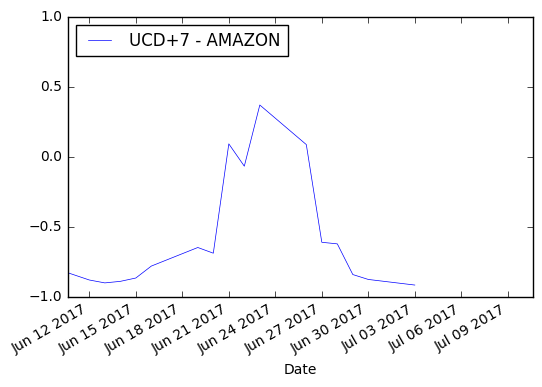

In [17]:
import pandas as pd

fig_3 = plt.figure()
g_3=fig_3.add_subplot(1,1,1)
pd.Series.rolling(ucd_ahead7.Close, window=7).corr(ama.Close).dropna().plot(ax=g_3, style='b-',linewidth=0.5, label='UCD+7 - AMAZON')
g_3.legend(loc='upper left')
g_3.set_xlim([start_x,end])
g_3.set_ylim([-1,1])


(-1, 1)

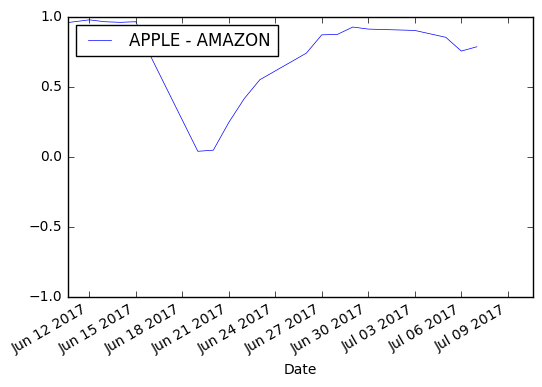

In [15]:
fig_4 = plt.figure()
g_4=fig_4.add_subplot(1,1,1)
pd.Series.rolling(apl.Close, window=7).corr(ama.Close).dropna().plot(ax=g_4, style='b-',linewidth=0.5, label='APPLE - AMAZON')
g_4.legend(loc='upper left')
g_4.set_xlim([start_x,end])
g_4.set_ylim([-1,1])
